In [8]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())

In [9]:
strats = fread('stratified_genome_metadata.tsv')
setnames(strats, 'genome_ID', 'genome')

In [10]:
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju')

In [11]:
d1 = data.table(expand.grid(tool=tools, genome=strats$genome))
d1[, method := 'relabund']
d1[tool=='kraken', method := 'reads_wise']
d1[tool=='kaiju', method := 'reads_wise']
d1[1:3]

tool,genome,method
<fct>,<fct>,<chr>
singlem,GCA_019422935.1_genomic,relabund
metaphlan,GCA_019422935.1_genomic,relabund
motus,GCA_019422935.1_genomic,relabund


In [12]:
# output_singlem/opal/GCA_022615805.1_genomic.opal_report
d2 = d1[, fread(paste('output_',tool,sep='','/opal/',genome,'.',method,'.opal_report')), by=list(tool,genome)]
d2[1:3]

tool,genome,tool,rank,metric,sample,value
<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,Gold standard,kingdom,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,phylum,Bray-Curtis distance,SAMPLEID,0
singlem,GCA_019422935.1_genomic,Gold standard,class,Bray-Curtis distance,SAMPLEID,0


In [13]:
dim(d2)

[1] 131040      7

In [14]:
setnames(d2, c('tool','genome','blah','rank','metric','sample','value'))
d3 = d2[blah != 'Gold standard'][,.(tool, genome, rank, metric, value)]
d3[1:3]
dim(d3)

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.03126515
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03032526


[1] 65520     5

In [15]:
bc = d3[metric=='Bray-Curtis distance']
dim(bc)
bc[1:10]

[1] 5040    5

tool,genome,rank,metric,value
<fct>,<fct>,<chr>,<chr>,<dbl>
singlem,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.03126515
singlem,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,class,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,order,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,family,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,genus,Bray-Curtis distance,0.03032526
singlem,GCA_019422935.1_genomic,species,Bray-Curtis distance,0.53279293
metaphlan,GCA_019422935.1_genomic,kingdom,Bray-Curtis distance,0.12575210
metaphlan,GCA_019422935.1_genomic,phylum,Bray-Curtis distance,0.12575210


In [16]:
bc2 = merge(bc, strats, by='genome')
bc2[1:10]

genome,tool,rank,metric,value,novelty_category,taxonomy
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.003928171,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.389726027,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.374517375,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,order,Bray-Curtis distance,0.356446371,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,family,Bray-Curtis distance,0.333582648,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,genus,Bray-Curtis distance,0.333582648,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,singlem,species,Bray-Curtis distance,0.333582648,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,kingdom,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095
GCA_013154095.1_genomic,metaphlan,phylum,Bray-Curtis distance,0.500000000,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095


In [17]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novel_orders = gsub('^','novel ',orders)
bc2[, rank := factor(rank, levels=orders)]
bc2[, novelty_category := factor(novelty_category, levels=orders)]

In [18]:
bc2[, kingdom := gsub('d__', 'novel ', gsub(';.*','',taxonomy))]
bc2[, novelty_category_novel := factor(gsub('^','novel ',novelty_category), levels=novel_orders)]
bc2[1:3]

genome,tool,rank,metric,value,novelty_category,taxonomy,kingdom,novelty_category_novel
<chr>,<fct>,<fct>,<chr>,<dbl>,<fct>,<chr>,<chr>,<fct>
GCA_013154095.1_genomic,singlem,kingdom,Bray-Curtis distance,0.003928171,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,phylum,Bray-Curtis distance,0.389726027,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum
GCA_013154095.1_genomic,singlem,class,Bray-Curtis distance,0.374517375,phylum,d__Archaea;p__JAADDD01;c__JAADDD01;o__JAADDD01;f__JAADDD01;g__JAADDD01;s__JAADDD01 sp013154095,novel Archaea,novel phylum


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


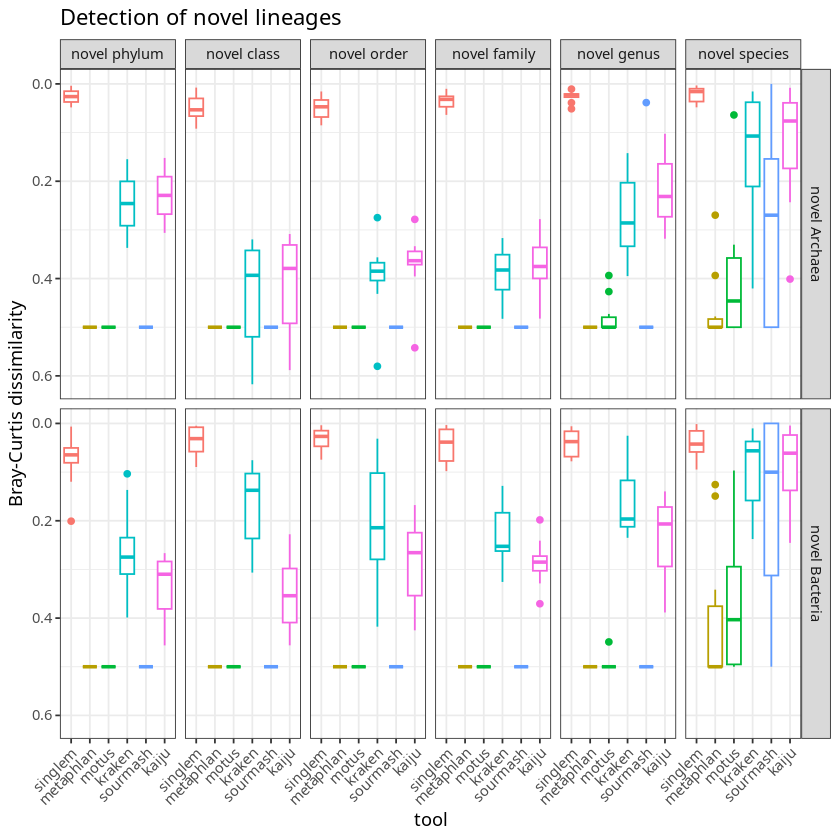

In [19]:
qplot(data=bc2[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [20]:
# stats
bc2[rank=='kingdom', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.0415318,0.03126561
metaphlan,0.4894577,0.05346361
motus,0.4784071,0.07149625
kraken,0.2442715,0.13072057
sourmash,0.4518069,0.13477216
kaiju,0.2806075,0.12203173


In [21]:
bc2[rank=='kingdom' & kingdom=='novel Archaea', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03498637,0.02199140
metaphlan,0.49251231,0.03635457
motus,0.47513386,0.07303323
kraken,0.31568128,0.14012641
sourmash,0.44652421,0.13679958
kaiju,0.28905982,0.13859940


In [22]:
bc2[rank=='kingdom' & novelty_category=='species', .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.03129147,0.02523586
metaphlan,0.43674640,0.11996951
motus,0.38332991,0.13992757
kraken,0.12455964,0.11656514
sourmash,0.23391852,0.20662254
kaiju,0.10551985,0.10231252


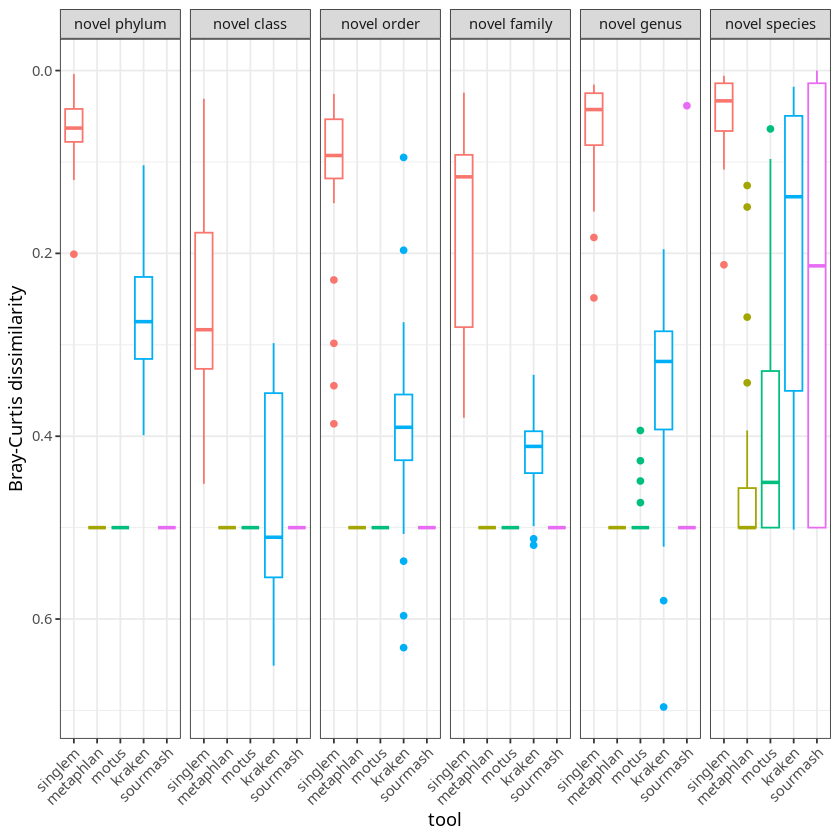

In [23]:
# What about when the rank equals the novelty category?
qplot(data=bc2[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], ylab='Bray-Curtis dissimilarity', tool, colour=tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [24]:
# stats
bc2[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.1233344,0.11565298
metaphlan,0.4894577,0.05346361
motus,0.4784808,0.07144929
kraken,0.3507090,0.14713619
sourmash,0.4518069,0.13477216


In [25]:
bc2[tool != 'kaiju' & tool != 'singlem'][rank==orders[as.numeric(novelty_category)-1]][, .(ave=mean(value), sd=sd(value)), by=list(tool)][,.(ave=mean(ave), sd=mean(sd))]

ave,sd
<dbl>,<dbl>
0.4426136,0.1017053


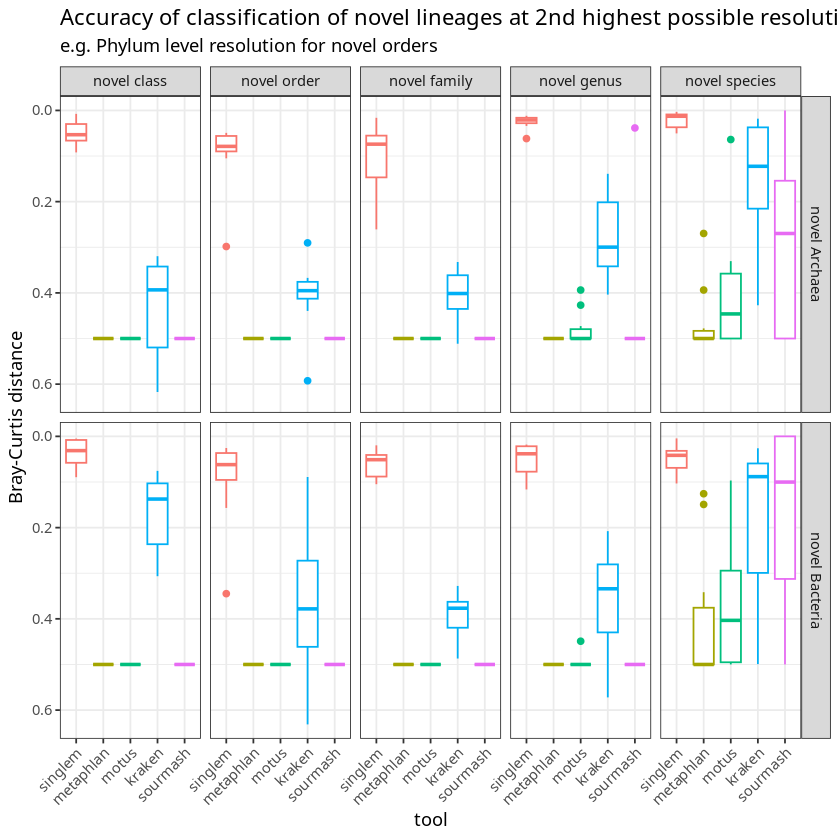

In [26]:
# What about when the rank equals one level above the novelty category?
qplot(data=bc2[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]], main='Accuracy of classification of novel lineages at 2nd highest possible resolution',  colour=tool, ylab='Bray-Curtis distance', tool, value, geom='boxplot')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+labs(subtitle='e.g. Phylum level resolution for novel orders')+theme(legend.position='none')+scale_y_reverse()

In [27]:
bc2[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-2]][, .(ave=mean(value), sd=sd(value)), by=list(tool)]

tool,ave,sd
<fct>,<dbl>,<dbl>
singlem,0.05818929,0.05792127
metaphlan,0.48734928,0.05838545
motus,0.47408846,0.07766178
kraken,0.30307787,0.15088067
sourmash,0.44216832,0.14584200


In [28]:
# Write out data for plotting benchmarks altogether
fwrite(bc2, 'bray_curtis.tsv', sep='\t')

# How much does SingleM over-classify to the species level?

In [66]:
# Read in the singlem .profile file for each species
profiles = data.table(expand.grid(tool=tools, genome=strats$genome))
profiles2 = profiles[, fread(paste('output_',tool,'/',tool,'/',genome,'.profile',sep=''), sep='\t'), by=.(tool,genome)]
profiles2[1:3]

tool,genome,sample,coverage,taxonomy
<fct>,<fct>,<chr>,<dbl>,<chr>
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.16,Root; d__Archaea
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.21,Root; d__Bacteria
singlem,GCA_019422935.1_genomic,GCA_019422935.1_genomic.1,0.18,Root; d__Bacteria; p__Desulfobacterota_I; c__Desulfovibrionia; o__Desulfovibrionales; f__Desulfovibrionaceae; g__Desulfovibrio


In [104]:
# Only care about s__ entries. Then order by abundance reverse, remove the top one.
get_abundance_of_non_top_species = function(sd) {
    # sd[, is_non_novel := F]
    # sd[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
    # sd[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]
    return(sd[is_non_novel==F, sum(coverage)] / sum(sd$coverage) * 2)
    # print(sd)
    # if (nrow(sd) == 1) {
    #     return(0)
    # } else {
    #     return(sd[2:nrow(sd), sum(coverage)] / sum(sd$coverage[1]))
    # }
}
profiles2[, is_non_novel := F]
profiles2[grep('s__Staphylococcus aureus', taxonomy), is_non_novel := T]
profiles2[grep('s__Methanobrevibacter ruminantium', taxonomy), is_non_novel := T]
overclassification_rates = profiles2[grep('s__',taxonomy)][order(-coverage)][,.(overclassification=get_abundance_of_non_top_species(.SD)), by=.(tool,genome)]
summary(overclassification_rates[tool=='singlem']$overclassification)

overclassification_rates[tool=='singlem'][overclassification > 0.3]
table(overclassification_rates$tool)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.06832 0.00000 1.05279 

tool,genome,overclassification
<fct>,<fct>,<dbl>
singlem,GCA_020161365.1_genomic,0.5749086
singlem,GCA_020249145.1_genomic,0.3647799
singlem,GCA_020860125.1_genomic,0.7950566
singlem,GCA_022678445.1_genomic,0.7147929
singlem,GCA_019422935.1_genomic,1.0527888
singlem,GCA_020053305.1_genomic,0.7376147
singlem,GCA_023379805.1_genomic,0.5054785
singlem,GCF_024707485.1_genomic,0.5928473
singlem,GCF_021184045.1_genomic,0.9520174



  singlem metaphlan     motus    kraken  sourmash     kaiju 
      120       120       120       120       120       120 

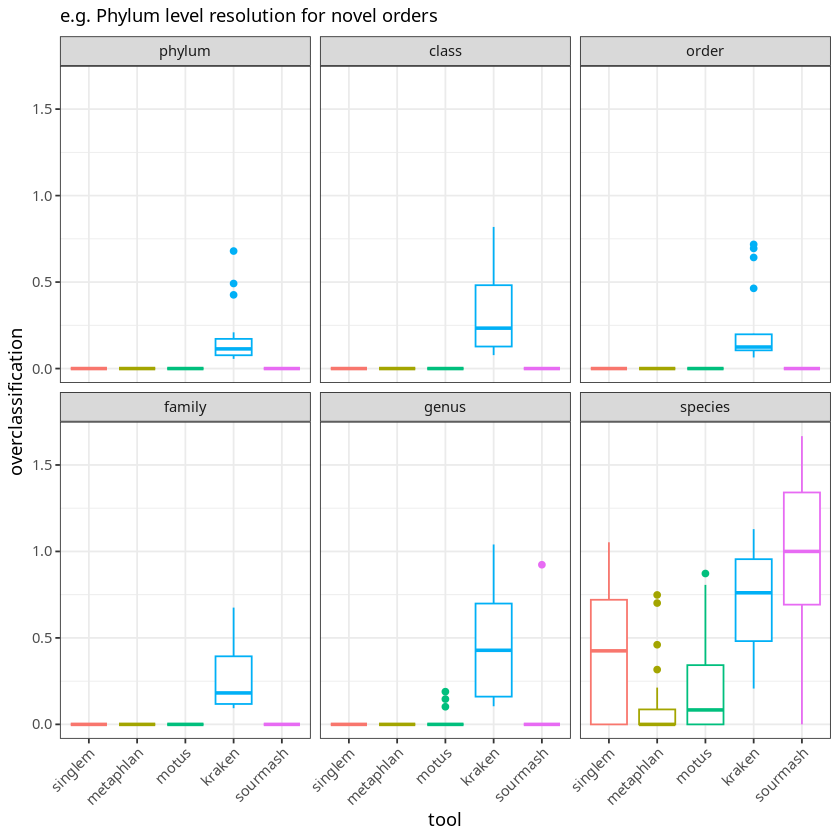

In [108]:
# What about per-taxon level?
overclassification_rates2 = merge(overclassification_rates, strats, by='genome')
overclassification_rates2[, novelty_category := factor(novelty_category, levels=orders)]
overclassification_rates2[, tool := factor(tool, levels=tools)]
qplot(data=overclassification_rates2[tool != 'kaiju'], tool, overclassification, geom='boxplot', colour=tool)+facet_wrap(~novelty_category)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+labs(subtitle='e.g. Phylum level resolution for novel orders')+theme(legend.position='none')

In [106]:
# So at the novel species level, what coverage is estimated
summary(overclassification_rates2[tool=='singlem'][novelty_category=='species', overclassification])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.4252  0.4099  0.7205  1.0528 

In [107]:
# So in this setup, on average when a species is present at 10x coverage, then 41% of that coverage (median 43%) is parsed out to a different known species.
# When novel at higher levels, no evidence of species-level overclassification.

# So if say 12% was soil, and all of that was novel at the species level only, and behaves like in the above test, then 41% of that would be overclassified. So 59% of 12% would be overclassified. So 7% of the total would be the true known species fraction.